In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
zscores = pd.read_csv(r'..\..\datasets\df_zscores_most_common_ncm.csv', encoding='latin-1')
zscores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76457 entries, 0 to 76456
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nf_timestamp     76457 non-null  float64
 1   emit_lat         76457 non-null  float64
 2   emit_long        76457 non-null  float64
 3   prod_quant       76457 non-null  float64
 4   prod_valor_unit  76457 non-null  float64
dtypes: float64(5)
memory usage: 2.9 MB


In [120]:
ol_iforest = pd.read_csv(r'..\iforest\output\outliers.csv', encoding='latin-1')
ol_iforest.set_index('idx', inplace=True)
ol_iforest = ol_iforest.sort_values(by='anomaly_score', ascending=True)
iforest_idx = ol_iforest.index.values
zscores_iforest = zscores.loc[iforest_idx]
zscores_iforest = zscores_iforest.reindex(iforest_idx)
zscores_iforest

,nf_timestamp,emit_lat,emit_long,prod_quant,prod_valor_unit
71964,-1.360883,-5.955008,-3.437015,3.170481,-1.504954
71971,-1.387556,-5.955008,-3.437015,3.563742,-1.449303
71970,1.387102,-5.955008,-3.437015,3.276213,-1.543092
71966,-1.360883,-5.955008,-3.437015,2.489288,-1.484148
76339,-1.455102,-4.597758,-2.183588,3.000910,-0.857326
...,...,...,...,...,...
74025,-0.198380,-4.422251,-2.148011,1.474190,1.033942
73171,0.199354,-4.231275,-2.088403,1.729338,-1.367608
67416,-1.251379,-4.038414,-2.419441,-1.000158,-1.039232
70838,0.853328,-7.038654,-3.138429,-0.831963,0.134258


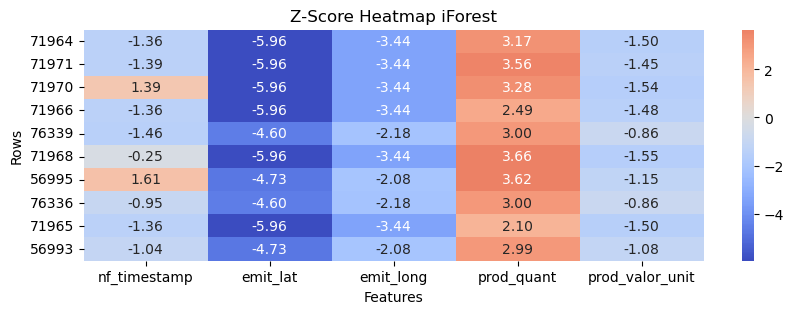

In [121]:
plt.figure(figsize=(10, 3))  # Set the figure size
sns.heatmap(zscores_iforest.head(10), center=0, cmap='coolwarm', annot=True, fmt=".2f")  # cmap specifies color map, annot adds values, fmt sets formatting
plt.title('Z-Score Heatmap iForest')
plt.xlabel('Features')
plt.ylabel('Rows')
plt.show()

In [122]:
ol_som = pd.read_csv(r'..\som\output\outliers.csv', encoding='latin-1')
ol_som.set_index('idx', inplace=True)
ol_som = ol_som.sort_values(by='anomaly_score', ascending=False)
som_idx = ol_som.index.values
zscores_som = zscores.loc[som_idx]
zscores_som = zscores_som.reindex(som_idx)
zscores_som

,nf_timestamp,emit_lat,emit_long,prod_quant,prod_valor_unit
70971,1.269877,-2.762958,-2.710404,1.122891,2.806499
46590,-1.113111,-4.562629,-1.309779,2.316948,1.020352
57460,1.525289,-1.399925,-4.178443,0.626757,0.247678
42872,1.283100,-1.036111,-0.478017,1.076971,-0.904789
63269,-0.029785,-0.844751,-3.628101,1.645391,-0.761968
...,...,...,...,...,...
57462,1.525289,-1.399925,-4.178443,-0.831963,1.583130
71797,1.428853,-4.162271,-1.826019,-0.024759,-1.269188
70969,1.676254,-2.762958,-2.710404,1.366578,-0.240707
73451,-0.134999,0.173047,-0.037357,-0.831963,3.301572


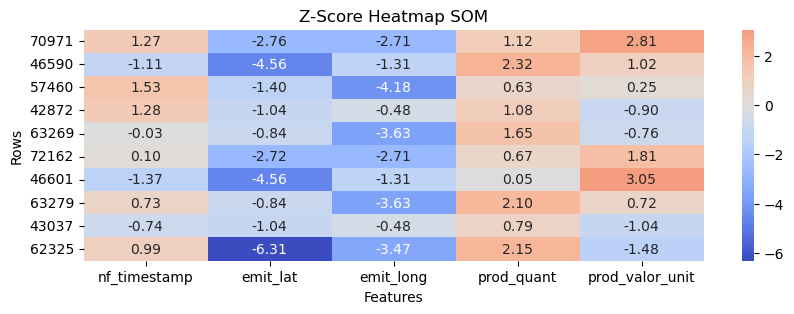

In [123]:
plt.figure(figsize=(10, 3))  # Set the figure size
sns.heatmap(zscores_som.head(10), center=0, cmap='coolwarm', annot=True, fmt=".2f")  # cmap specifies color map, annot adds values, fmt sets formatting
plt.title('Z-Score Heatmap SOM')
plt.xlabel('Features')
plt.ylabel('Rows')
plt.show()

In [124]:
ol_lof = pd.read_csv(r'..\lof\output\outliers.csv', encoding='latin-1')
ol_lof.set_index('idx', inplace=True)
ol_lof = ol_lof.sort_values(by='anomaly_score', ascending=True)
lof_idx = ol_lof.index.values
zscores_lof = zscores.loc[lof_idx]
zscores_lof = zscores_lof.reindex(lof_idx)
zscores_lof

,nf_timestamp,emit_lat,emit_long,prod_quant,prod_valor_unit
72126,1.488388,-2.721044,-2.712263,1.941124,-0.404306
72187,1.488388,-2.721044,-2.712263,1.865528,-0.404306
49364,0.360840,0.148470,0.633454,-0.712626,-0.018004
49143,0.138622,0.148470,0.633454,-0.712626,-0.214574
68373,0.643380,0.170591,0.625094,-0.620062,-0.099117
...,...,...,...,...,...
67036,-0.021684,0.118073,0.349127,-0.480486,1.978067
74414,-0.134999,0.163065,0.108958,-1.000158,0.826679
59750,0.417025,0.335466,-0.042229,-1.000158,0.568059
63969,-0.686440,0.285202,0.282105,0.063836,1.651703


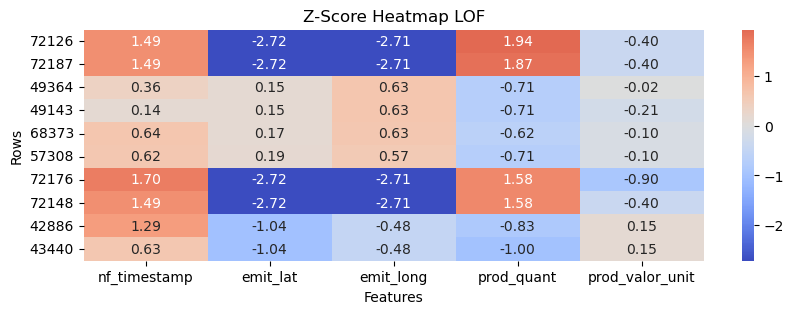

In [125]:
plt.figure(figsize=(10, 3))  # Set the figure size
sns.heatmap(zscores_lof.head(10), center=0, cmap='coolwarm', annot=True, fmt=".2f")  # cmap specifies color map, annot adds values, fmt sets formatting
plt.title('Z-Score Heatmap LOF')
plt.xlabel('Features')
plt.ylabel('Rows')
plt.show()

In [126]:
intersec = pd.read_csv(r'output\som_iforest_intersec.csv', encoding='latin-1')
intersec = intersec['idx']
zscores_intersec = zscores.loc[intersec]
zscores_intersec = zscores_intersec.reindex(intersec)
zscores_intersec

,nf_timestamp,emit_lat,emit_long,prod_quant,prod_valor_unit
idx,,,,,
46592,0.841154,-4.562629,-1.309779,2.413667,-1.537501
46593,0.863551,-4.562629,-1.309779,2.587338,-1.299053
46594,1.546899,-4.562629,-1.309779,2.201803,-1.537501
73219,1.119949,-4.231275,-2.088403,1.578203,-0.640026
46596,0.027621,-4.562629,-1.309779,2.739194,-1.454165
...,...,...,...,...,...
46587,-1.449853,-4.562629,-1.309779,2.890910,-1.299053
46588,-0.210396,-4.562629,-1.309779,2.572522,-1.537501
46589,-1.113111,-4.562629,-1.309779,1.793242,0.169216


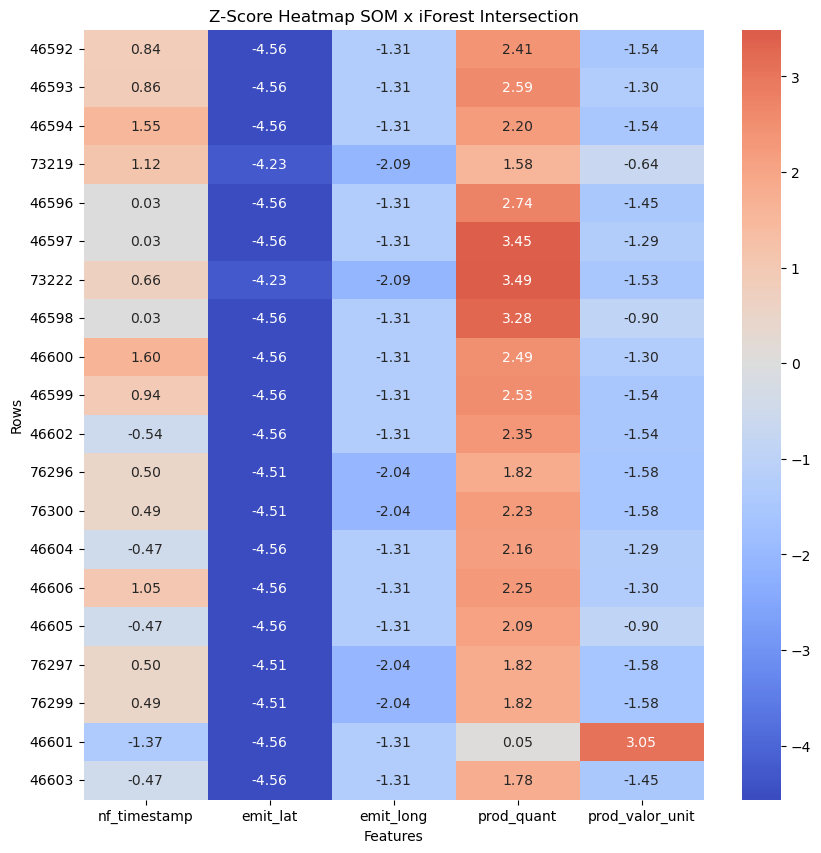

In [127]:
plt.figure(figsize=(10, 10))  # Set the figure size
sns.heatmap(zscores_intersec.head(20), center=0, cmap='coolwarm', annot=True, fmt=".2f")  # cmap specifies color map, annot adds values, fmt sets formatting
plt.title('Z-Score Heatmap SOM x iForest Intersection')
plt.xlabel('Features')
plt.ylabel('Rows')
plt.show()

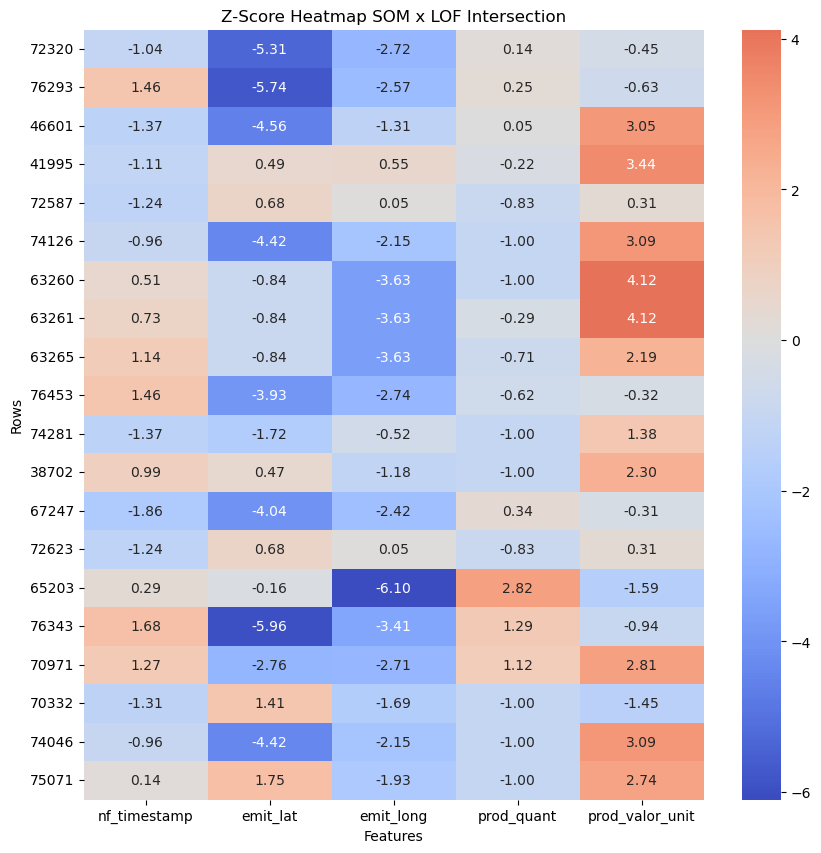

In [128]:
intersec = pd.read_csv(r'output\som_lof_intersec.csv', encoding='latin-1')
intersec = intersec['idx']
zscores_intersec = zscores.loc[intersec]
zscores_intersec = zscores_intersec.reindex(intersec)
zscores_intersec

plt.figure(figsize=(10, 10))  # Set the figure size
sns.heatmap(zscores_intersec.head(20), center=0, cmap='coolwarm', annot=True, fmt=".2f")  # cmap specifies color map, annot adds values, fmt sets formatting
plt.title('Z-Score Heatmap SOM x LOF Intersection')
plt.xlabel('Features')
plt.ylabel('Rows')
plt.show()

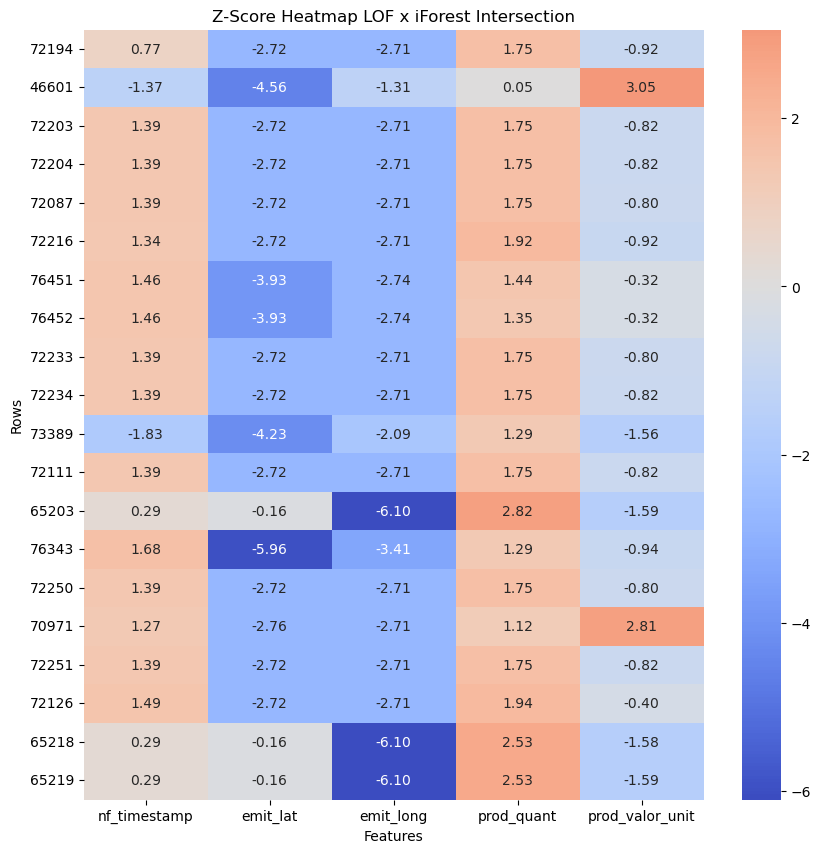

In [129]:
intersec = pd.read_csv(r'output\lof_iforest_intersec.csv', encoding='latin-1')
intersec = intersec['idx']
zscores_intersec = zscores.loc[intersec]
zscores_intersec = zscores_intersec.reindex(intersec)
zscores_intersec

plt.figure(figsize=(10, 10))  # Set the figure size
sns.heatmap(zscores_intersec.head(20), center=0, cmap='coolwarm', annot=True, fmt=".2f")  # cmap specifies color map, annot adds values, fmt sets formatting
plt.title('Z-Score Heatmap LOF x iForest Intersection')
plt.xlabel('Features')
plt.ylabel('Rows')
plt.show()

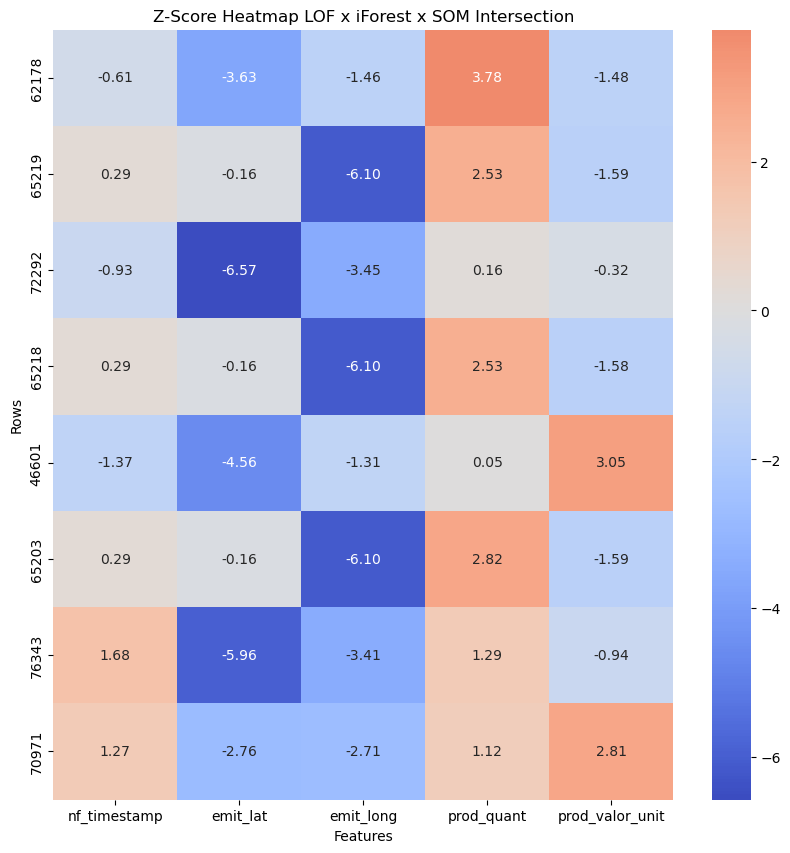

In [130]:
intersec = pd.read_csv(r'output\all_intersec.csv', encoding='latin-1')
intersec = intersec['idx']
zscores_intersec = zscores.loc[intersec]
zscores_intersec = zscores_intersec.reindex(intersec)
zscores_intersec

plt.figure(figsize=(10, 10))  # Set the figure size
sns.heatmap(zscores_intersec, center=0, cmap='coolwarm', annot=True, fmt=".2f")  # cmap specifies color map, annot adds values, fmt sets formatting
plt.title('Z-Score Heatmap LOF x iForest x SOM Intersection')
plt.xlabel('Features')
plt.ylabel('Rows')
plt.show()